# 1. Import Library

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

import warnings
warnings.filterwarnings("ignore")

# 2. Extract Data

In [15]:
df = pd.read_csv('/content/drive/MyDrive/Course Files/Course-Net/02. Kampus Merdeka/06. Association Rule/bread_basket.csv',
                 parse_dates=['date_time'])
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,2016-10-30 09:58:00,morning,weekend
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend
4,3,Jam,2016-10-30 10:07:00,morning,weekend


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Transaction      20507 non-null  int64         
 1   Item             20507 non-null  object        
 2   date_time        20507 non-null  datetime64[ns]
 3   period_day       20507 non-null  object        
 4   weekday_weekend  20507 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 801.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 3. Preprocessing

In [16]:
df['tanggal'] = df['date_time'].dt.date
df['month']   = df['date_time'].dt.month
df['tahun']   = df['date_time'].dt.year
df['hari']    = df['date_time'].dt.dayofweek
df['jam']     = df['date_time'].dt.hour
df['waktu']   = df['date_time'].dt.time


In [20]:
df['hari'] = df['hari'].replace([0,1,2,3,4,5,6],['Senin','Selasa','Rabu',
                                                 'Kamis','Jumat','Sabtu','Minggu'])

In [21]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,tanggal,month,tahun,hari,jam,waktu
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,10,2016,Minggu,9,09:58:00
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10,2016,Minggu,10,10:05:00
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10,2016,Minggu,10,10:05:00
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,10,2016,Minggu,10,10:07:00
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,10,2016,Minggu,10,10:07:00


# 4. Mini EDA

In [23]:
## Unique Product
df['Item'].nunique()

94

In [24]:
## Produk yang sering dibeli
df['Item'].value_counts()

Item
Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Bacon                1
Gift voucher         1
Olum & polenta       1
Raw bars             1
Polenta              1
Name: count, Length: 94, dtype: int64

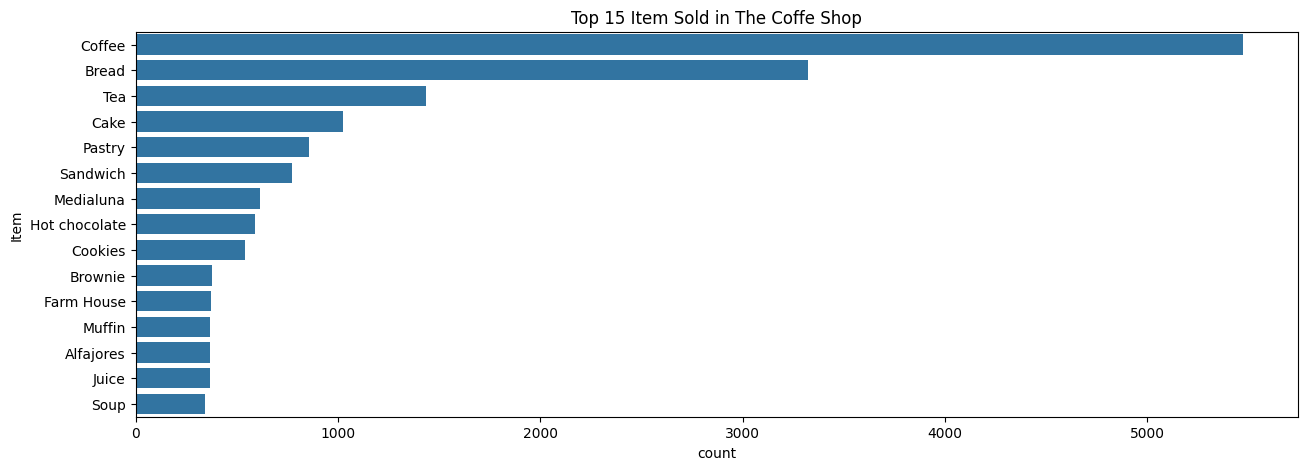

In [30]:
## Visualisasi Top Most Sold Products
df_most_sold = df['Item'].value_counts()
n = 15
plt.figure(figsize=(15,5))
sns.barplot(y=df['Item'].value_counts().head(n).index,
            x=df['Item'].value_counts().head(n))
plt.title(f"Top {n} Item Sold in The Coffe Shop")
plt.show()

<Axes: xlabel='jam', ylabel='Transaction'>

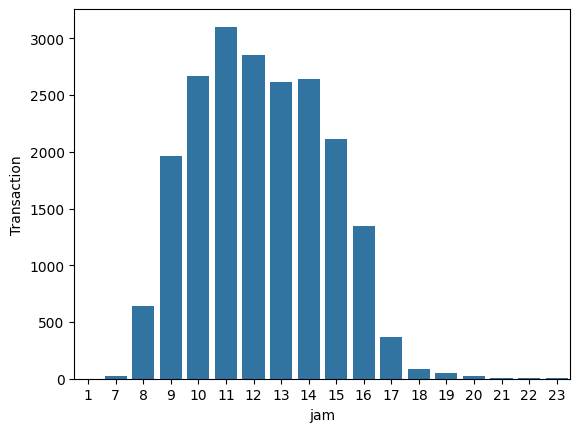

In [34]:
## Jumlah Transaksi per Jam
count_transaksi_per_jam = df.groupby(['jam'])["Transaction"].count().reset_index()
sns.barplot(y=count_transaksi_per_jam['Transaction'],
            x=count_transaksi_per_jam['jam'])

# 5. Association Rule

## 5.1. Prepare Table

In [35]:
transaction = df.groupby(['Transaction','Item'])['Item'].count().reset_index(name='Number of Item')
transaction

,Transaction,Item,Number of Item
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
...,...,...,...
18882,9682,Tacos/Fajita,1
18883,9682,Tea,1
18884,9683,Coffee,1
18885,9683,Pastry,1


In [38]:
final_table = transaction.pivot_table(index='Transaction',
                                      columns='Item',
                                      values='Number of Item',
                                      aggfunc='sum').fillna(0)
final_table = final_table.applymap(lambda x : 0 if x==0 else 1)
final_table

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 5.2. Association Rule
### Support

In [42]:
frequence = apriori(final_table,min_support=0.05,use_colnames=True)
frequence.sort_values('support',ascending=False)

,support,itemsets
2,0.478394,(Coffee)
0,0.327205,(Bread)
8,0.142631,(Tea)
1,0.103856,(Cake)
9,0.090016,"(Coffee, Bread)"
6,0.086107,(Pastry)
7,0.071844,(Sandwich)
5,0.061807,(Medialuna)
4,0.058320,(Hot chocolate)
10,0.054728,"(Coffee, Cake)"


### Confidence

In [44]:
rules_table = association_rules(frequence,min_threshold=0.1)
rules_table

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Coffee),(Bread),0.478394,0.327205,0.090016,0.188163,0.575059,-0.066517,0.828731,-0.586210
1,(Bread),(Coffee),0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561,-0.523431
2,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
3,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
